In [206]:
import numpy as np

import pandas as pd

import random

import matplotlib.pyplot as plt

import seaborn as sns


In [224]:
random.seed(123)
pd_iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')

pd_iris.columns = ['petal_length', 'petal_width', 'sepal_length', 'sepal_width', 'class']

rand_axis0 = [random.randint(0,150) for _ in range(5)]

rand_axis1 = [random.randint(0, 4) for _ in range(5)]

pd_iris.iloc[rand_axis0, rand_axis1] = np.NaN

 

rand_axis0 = [random.randint(0,150) for _ in range(5)]

rand_axis1 = [random.randint(0, 4) for _ in range(5)]

pd_iris.iloc[rand_axis0, rand_axis1] = 123.4 + random.randint(0,4)/10

 

df1 = pd.DataFrame(np.arange(100, 120).reshape(4,5), dtype='str')

In [188]:
pd_iris['petal_length'].describe()

count    145.000000
mean       5.843448
std        0.824605
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: petal_length, dtype: float64

In [189]:
pd_iris['petal_length'].mean()

5.843448275862069

In [223]:
pd_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   petal_length  149 non-null    object 
 1   petal_width   149 non-null    float64
 2   sepal_length  149 non-null    float64
 3   sepal_width   149 non-null    object 
 4   class         146 non-null    object 
dtypes: float64(2), object(3)
memory usage: 5.9+ KB


In [191]:
pd_iris['petal_length'].isnull().sum()

4

In [192]:
null_count = pd_iris['petal_length'].isnull().sum()
null_count

4

In [174]:
df1

,0,1,2,3,4
0,100,101,102,103,104
1,105,106,107,108,109
2,110,111,112,113,114
3,115,116,117,118,119


In [193]:
pd_iris['petal_length'].unique()

array([4.9, 4.7, 4.6, 5. , 5.4, 4.4, 4.8, 4.3, nan, 5.7, 5.1, 5.2, 5.5,
       4.5, 5.3, 7. , 6.4, 6.9, 6.5, 6.3, 6.6, 5.9, 6. , 6.1, 5.6, 6.7,
       5.8, 6.2, 6.8, 7.1, 7.3, 7.2, 7.7, 7.4, 7.9])

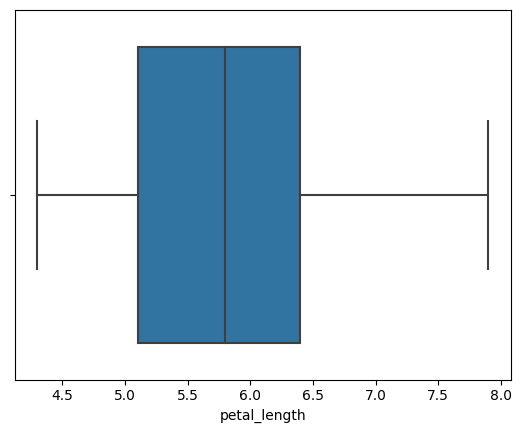

In [194]:
sns.boxplot(x="petal_length", data=pd_iris)
plt.show()

[문제]

* pd_iris 로부터, petal_length의 평균치를 구하고자 한다.

- petal_length의 결측치, 오류치, 이상치(1.5*IQR 바깥)의 갯수는 각 몇개인가.

- 결측치, 오류치, 이상치를 어떻게 처리할지 결정하고, (삭제, 다른 적절한 값으로 대체) 결정의 간단한 이유를 제시하시오.

- 결측치, 오류치, 이상치를 처리 하시오.

- petal_length의 평균치를 구하시오.

In [107]:
df1

,0,1,2,3,4
0,100,101,102,103,104
1,105,106,107,108,109
2,110,111,112,113,114
3,115,116,117,118,119


In [137]:
pd_iris['petal_length'].isnull().sum()

4

In [195]:
Q1 = pd_iris['petal_length'].quantile(0.25)
Q3 = pd_iris['petal_length'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
outliers = pd_iris[(pd_iris['petal_length'] < lower_bound) | (pd_iris['petal_length'] > upper_bound)]
outliers

,petal_length,petal_width,sepal_length,sepal_width,class


In [196]:
pd_iris['petal_length'] = pd_iris['petal_length'].fillna('0')
#pd_iris = pd_iris.dropna()

In [197]:
pd_iris['petal_length'].unique()

array([4.9, 4.7, 4.6, 5.0, 5.4, 4.4, 4.8, 4.3, '0', 5.7, 5.1, 5.2, 5.5,
       4.5, 5.3, 7.0, 6.4, 6.9, 6.5, 6.3, 6.6, 5.9, 6.0, 6.1, 5.6, 6.7,
       5.8, 6.2, 6.8, 7.1, 7.3, 7.2, 7.7, 7.4, 7.9], dtype=object)

In [141]:
pd_iris.loc[ pd_iris['petal_length'] == '5.'] = '5.0'
pd_iris.loc[ pd_iris['petal_length'] == '6.'] = '6.0'
pd_iris.loc[ pd_iris['petal_length'] == '7.'] = '7.0'

In [198]:
pd_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   petal_length  149 non-null    object 
 1   petal_width   149 non-null    float64
 2   sepal_length  149 non-null    float64
 3   sepal_width   145 non-null    float64
 4   class         146 non-null    object 
dtypes: float64(3), object(2)
memory usage: 5.9+ KB


In [143]:
pd_iris['petal_length'].astype(float)

0      4.9
1      4.7
2      4.6
3      5.0
4      5.4
      ... 
144    6.7
145    6.3
146    6.5
147    6.2
148    5.9
Name: petal_length, Length: 145, dtype: float64

In [133]:
pd_iris['petal_length'].mean()

5.8434482758620705

In [212]:
pd_iris['petal_length'] = pd_iris['petal_length'].fillna('0')
pd_iris['sepal_width'] = pd_iris['sepal_width'].fillna('0')


In [226]:
pd_iris

,petal_length,petal_width,sepal_length,sepal_width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [228]:
df1

,0,1,2,3,4
0,100,101,102,103,104
1,105,106,107,108,109
2,110,111,112,113,114
3,115,116,117,118,119


In [240]:
result = pd.concat([pd_iris, df1], axis=0)
result

,petal_length,petal_width,sepal_length,sepal_width,class,0,1,2,3,4
0,4.9,3.0,1.4,0.2,Iris-setosa,NaN,NaN,NaN,NaN,NaN
1,4.7,3.2,1.3,0.2,Iris-setosa,NaN,NaN,NaN,NaN,NaN
2,4.6,3.1,1.5,0.2,Iris-setosa,NaN,NaN,NaN,NaN,NaN
3,5.0,3.6,1.4,0.2,Iris-setosa,NaN,NaN,NaN,NaN,NaN
4,5.4,3.9,1.7,0.4,Iris-setosa,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
148,5.9,3.0,5.1,1.8,Iris-virginica,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,100,101,102,103,104
1,NaN,NaN,NaN,NaN,NaN,105,106,107,108,109
2,NaN,NaN,NaN,NaN,NaN,110,111,112,113,114
